# MMDETECTION-训练

liangyu 20230607

In [1]:
import torch
print(torch.__version__)
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

1.10.1+cu113


In [2]:
# # 安装Pytorch
#!pip3 install install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [3]:
# # 安装Pytorch
# !pip3 install install torch   torchvision  torchaudio 

In [4]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv==2.0.0.rc4'

/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py

In [5]:
torch.__version__

'1.10.1+cu113'

In [6]:
# 删掉原有的 mmsegmentation 文件夹（如有）
!rm -rf mmsegmentation

In [7]:
# 从 github 上下载最新的 mmsegmentation 源代码
!git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15117, done.
remote: Counting objects: 100% (684/684), done.
remote: Compressing objects: 100% (455/455), done.
remote: Total 15117 (delta 272), reused 433 (delta 197), pack-reused 14433
Receiving objects: 100% (15117/15117), 20.27 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (10581/10581), done.


In [8]:
pwd

'/home/liangyu/code/mmlab2/2023AI/0612'

In [16]:
# 进入主目录
import os
os.chdir('mmsegmentation')
!pip install -v -e .

Using pip 23.1.2 from /home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/pip (python 3.9)
Obtaining file:///home/liangyu/code/mmlab2/2023AI/0612/mmsegmentation
  Preparing metadata (setup.py) ...   Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-a9iunx7p/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-a9iunx7p/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-a9iunx7p/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-a9iunx7p/mmsegmentation.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-a9iunx7p/mmsegmentation.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-a9iunx7p/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-a9iunx7p/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest file '/tmp/

In [10]:
import os

# # 创建 checkpoint 文件夹，用于存放预训练模型权重文件
# os.mkdir('checkpoint')

# # 创建 outputs 文件夹，用于存放预测结果
# os.mkdir('outputs')

# # 创建 data 文件夹，用于存放图片和视频素材
# os.mkdir('data')

In [11]:
# 从 Model Zoo 获取 PSPNet 预训练模型，下载并保存在 checkpoint 文件夹中
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoint
# 伦敦街景图片
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg -P data

# 上海驾车街景视频，视频来源：https://www.youtube.com/watch?v=ll8TgCZ0plk
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4 -P data

# 街拍视频，2022年3月30日
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4 -P data


--2023-06-14 01:08:06--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 159.226.227.109, 159.226.227.113, 159.226.227.115, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|159.226.227.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoint/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  12.9MB/s    in 16s     

2023-06-14 01:08:22 (11.9 MB/s) - ‘checkpoint/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’ saved [196205945/196205945]

--2023-06-14 01:08:22--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (z

In [12]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 1.10.1+cu113
CUDA 是否可用 False


In [13]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())


MMCV版本 2.0.0rc4
CUDA版本 11.3
编译器版本 GCC 9.3


In [14]:
# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0


# chinese font downloading

/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf: No such file or directory


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/home/liangyu/miniconda3/envs/mmlab2/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.

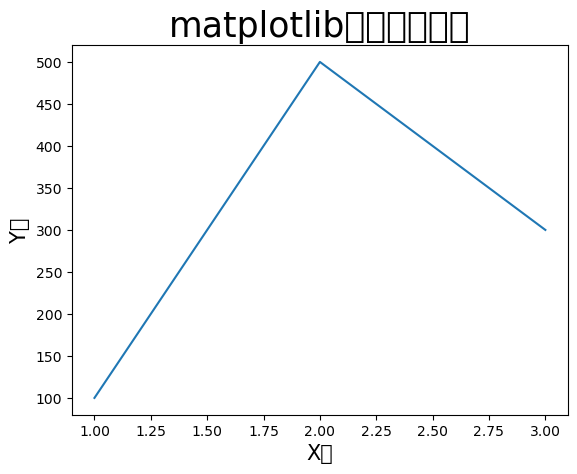

In [15]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()